In [36]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime as dt
from datetime import timedelta

In [2]:
import sqlite3

# Reflect Tables into SQLAlchemy ORM

In [3]:
#Connect to sqlite file
conn = sqlite3.connect(os.path.join("Resources","hawaii.sqlite"))

In [4]:
#initialize cursor and pull table names
curs = conn.cursor()
curs.execute("select name from sqlite_master where type = 'table'")

In [5]:
#print table names
rows = curs.fetchall()
for row in rows:
    print(row)

('measurement',)
('station',)


In [6]:
#get measurement table column names
curs.execute("select sql from sqlite_master where name='measurement'")
rows = curs.fetchall()
for row in rows:
    print(row)

('CREATE TABLE measurement (\n\tid INTEGER NOT NULL, \n\tstation TEXT, \n\tdate TEXT, \n\tprcp FLOAT, \n\ttobs FLOAT, \n\tPRIMARY KEY (id)\n)',)


In [7]:
#get station table column names
curs.execute("select sql from sqlite_master where name='station'")
rows = curs.fetchall()
for row in rows:
    print(row)

('CREATE TABLE station (\n\tid INTEGER NOT NULL, \n\tstation TEXT, \n\tname TEXT, \n\tlatitude FLOAT, \n\tlongitude FLOAT, \n\televation FLOAT, \n\tPRIMARY KEY (id)\n)',)


In [46]:
curs.execute("select max(date) from measurement")
rows = curs.fetchall()
for row in rows:
    maxDate =(row[0])
maxDate = dt.strptime(maxDate,'%Y-%m-%d')
sDate = maxDate - timedelta(days=365)
str(sDate)

'2016-08-23 00:00:00'

# Exploratory Climate Analysis

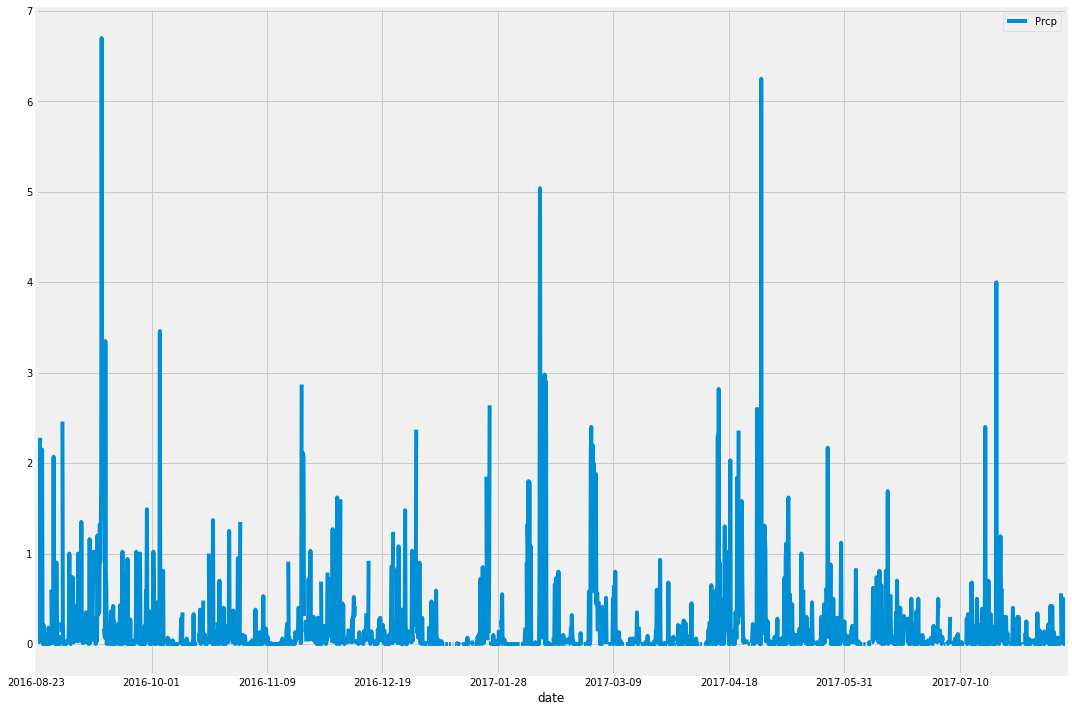

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
curs.execute("select Date(date) as dt, prcp from measurement order by dt DESC;")
precip = []
dates = []
rows = curs.fetchall()
for row in rows:
    dates.append(row[0])

# Calculate the date 1 year ago from the last data point in the database
max(dates)


# Perform a query to retrieve the data and precipitation scores
curs.execute("select date, prcp from measurement;")
rows = curs.fetchall()
for row in rows:
    if row[0]>= '2016-08-23':
        precip.append(row)
        
# Save the query results as a Pandas DataFrame and set the index to the date column
precipDF = pd.DataFrame(precip,columns=["Date","Prcp"]).set_index("Date")

# Sort the dataframe by date
precipDF = precipDF.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
precipDF.plot(x_compat=True,figsize =(15,10))
plt.xlabel("date")
plt.tight_layout()
plt.show()

![precipitation](Images/precipitation.png)

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipDF.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
#Get colum headers in station table
curs.execute("select sql from sqlite_master where name = 'station';")
rows = curs.fetchall()
for row in rows:
    print(row)

('CREATE TABLE station (\n\tid INTEGER NOT NULL, \n\tstation TEXT, \n\tname TEXT, \n\tlatitude FLOAT, \n\tlongitude FLOAT, \n\televation FLOAT, \n\tPRIMARY KEY (id)\n)',)


![describe](Images/describe.png)

In [16]:
# Design a query to show how many stations are available in this dataset?
curs.execute("select count(station) from station;")
rows = curs.fetchall()
for row in rows:
    print(row)

(9,)


In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
curs.execute("select station, count(station) as ct from measurement group by station order by ct DESC;")
rows = curs.fetchall()
for row in rows:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
curs.execute("select MIN(tobs),MAX(tobs),AVG(tobs) from measurement where station = 'USC00519281';")
rows = curs.fetchall()
for row in rows:
    print(row)

(54.0, 85.0, 71.66378066378067)


In [35]:
#Get max date for station
curs.execute("select max(date) from measurement where station = 'USC00519281';")
rows = curs.fetchall()
for row in rows:
    print(row)


('2017-08-18',)


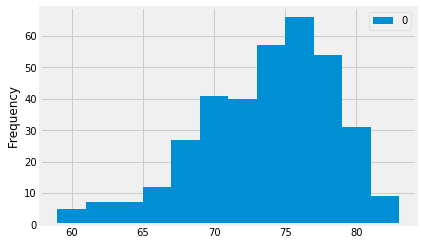

In [36]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = []
curs.execute("select tobs from measurement where station = 'USC00519281' and date>'2016-08-18';")
rows = curs.fetchall()
for row in rows:
    temps.append(row)

tempDF = pd.DataFrame(temps)
tempDF.plot(kind="hist",bins=12)


![precipitation](Images/station-histogram.png)

In [37]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'session' is not defined

In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


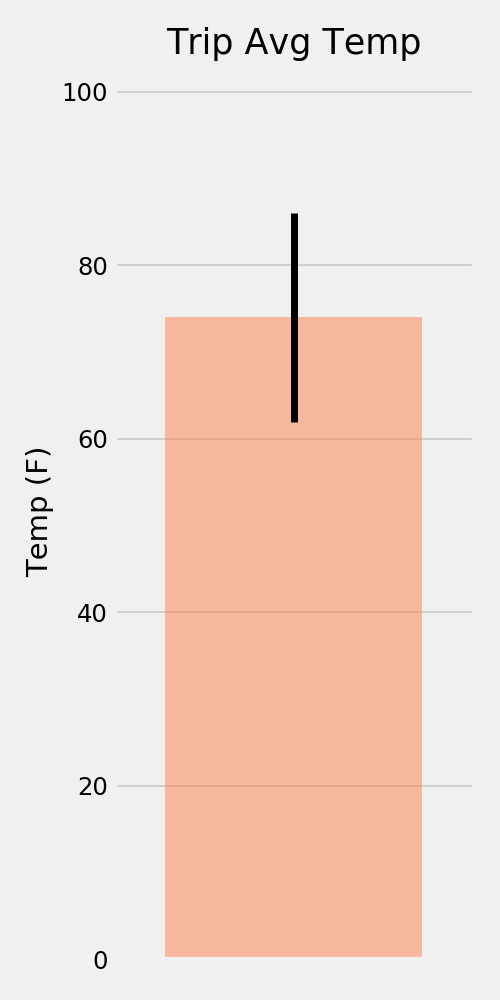

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


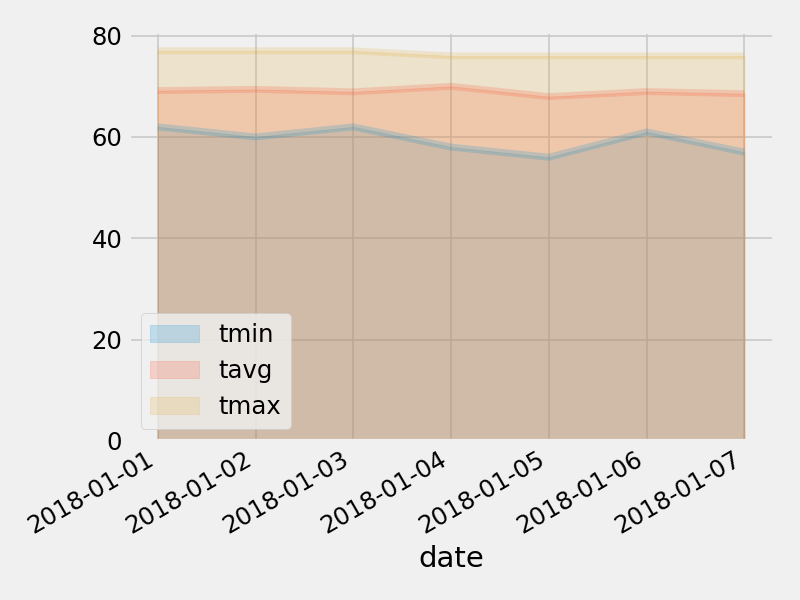

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
